## Change Point Detection

**Table of Contents**
* Section 0: Generate time series
* Section 1: changefinder (online)
* Section 2: Ruptures (offline)
    
Reference:
* [Accelerating Online Change-Point Detection Algorithm using 10GbE FPGA NIC](https://www.arc.ics.keio.ac.jp/~matutani/papers/iwata_heteropar2018.pdf)
* [Github](https://github.com/shunsukeaihara/changefinder/blob/master/changefinder/__init__.py)

In [27]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
# !pip install changefinder
import changefinder

### Section 0: Generate time series

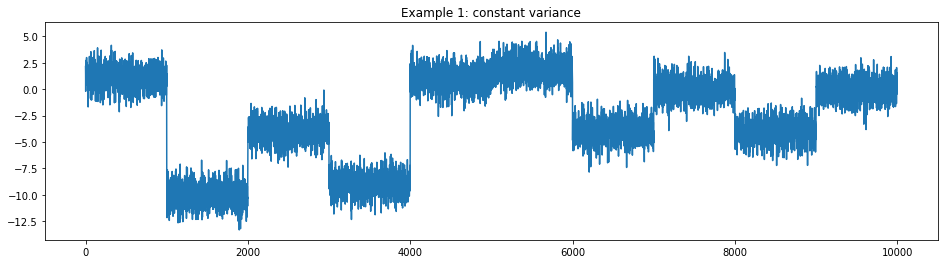

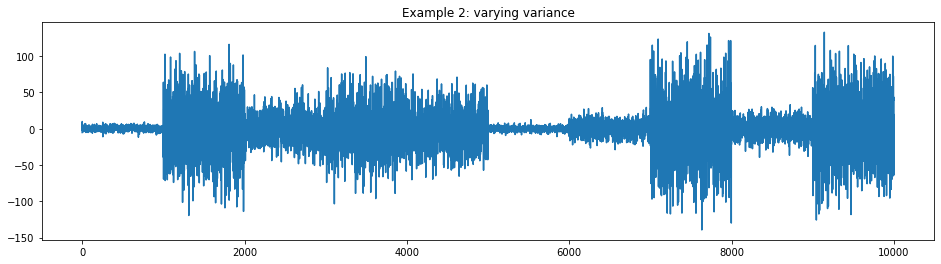

In [43]:
# Constant variance
ts1 = []
mu, sigma, seg = 0.0, 1.0, 1000
for i in range(10):
    ts = np.random.normal(mu, sigma, seg) + np.random.randint(low=-10, high=10)
    ts1 = np.append(ts1,ts, axis=0)
plt.figure(figsize=(16,4))
plt.title('Example 1: constant variance')
plt.plot(ts1)

# Varying variance
ts2 = []
mu, sigma, seg = 0.0, 1.0, 1000
for i in range(10):
    sig = np.random.randint(low=1, high=50)
    ts = np.random.normal(mu, sigma * sig, seg) 
    ts2 = np.append(ts2,ts, axis=0)    
plt.figure(figsize=(16,4))
plt.title('Example 2: varying variance')
plt.plot(ts2)

### Section 1: changefinder
#### Section 1.1: Constant variance

In [29]:
def findChangePoints(ts, r, order, smooth):
    '''
       r: Discounting rate
       order: AR model order
       smooth: smoothing window size T
    '''
    cf = changefinder.ChangeFinder(r=r, order=order, smooth=smooth)
    ts_score = [cf.update(p) for p in ts]
    plt.figure(figsize=(16,4))
    plt.plot(ts)
    plt.figure(figsize=(16,4))
    plt.plot(ts_score, color='red')
    return(ts_score)

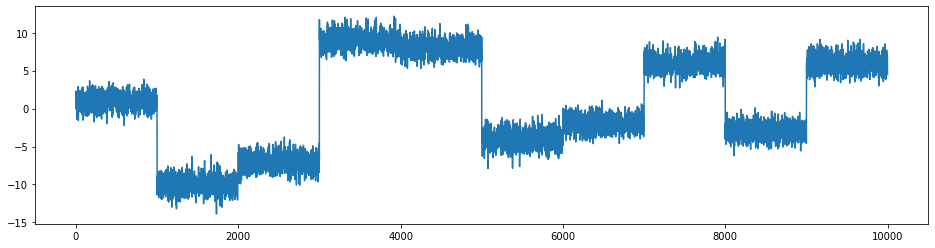

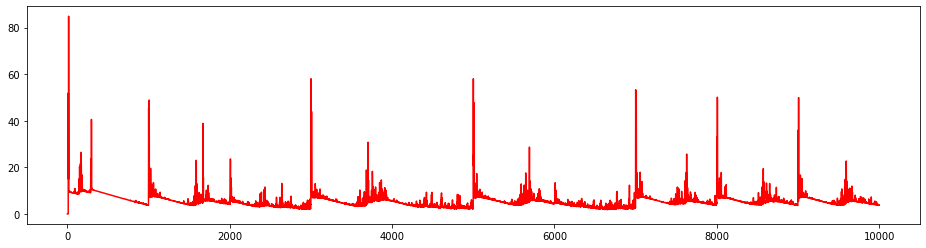

In [30]:
ts_score1 = findChangePoints(ts1, r = 0.01, order = 3, smooth = 5)

In [31]:
ts_change_loc1 = pd.Series(ts_score1).nlargest(20)
ts_change_loc1 = ts_change_loc1.index
ts_change_loc1

Int64Index([  15,   14, 5001, 3001, 7001, 7008,   11, 7007, 8007, 9008, 3000,
            8008, 1008, 1007, 5008, 5000, 1001, 5007, 3008, 3007],
           dtype='int64')

In [32]:
def plot_change_points(ts,ts_change_loc):
    plt.figure(figsize=(16,4))
    plt.plot(ts)
    for x in ts_change_loc:
        plt.axvline(x,lw=2, color='red')

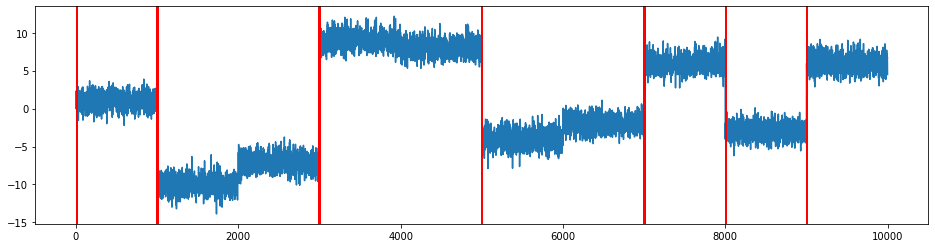

In [33]:
plot_change_points(ts1,ts_change_loc1)

#### Section 1.2: Varying variance

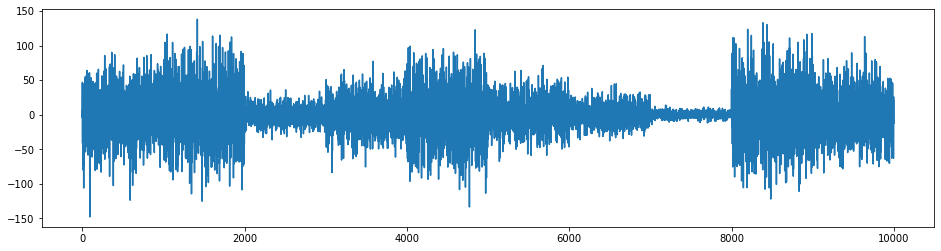

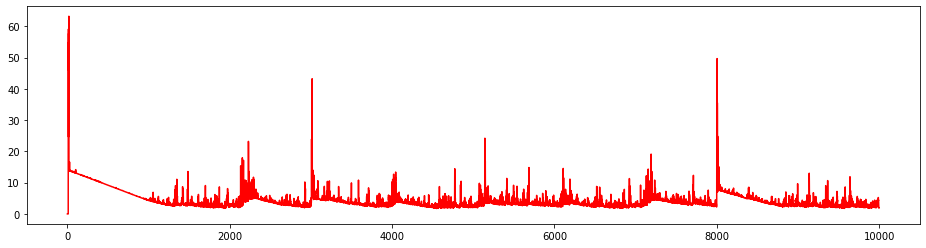

In [34]:
ts_score2 = findChangePoints(ts2, r = 0.01,     order = 3,  smooth = 5)

In [35]:
ts_change_loc2 = pd.Series(ts_score2).nlargest(20)
ts_change_loc2 = ts_change_loc2.index

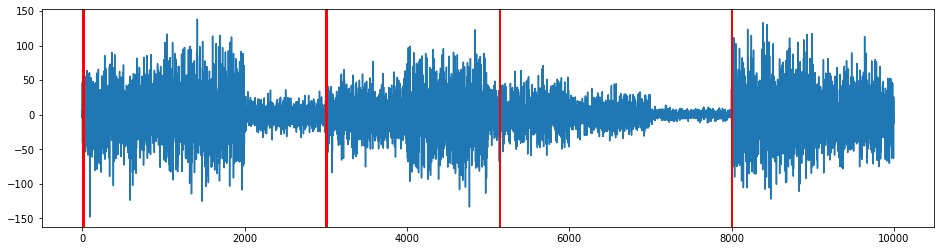

In [36]:
plot_change_points(ts2,ts_change_loc2)

### Section 2 Ruptures (offline)
* [Ruptures github](https://github.com/deepcharles/ruptures)

#### Section 2.1 constant variance

In [37]:
!pip install ruptures
import ruptures as rpt

In [38]:
# detection
algo1 = rpt.Pelt(model="rbf").fit(ts1)
change_location1 = algo1.predict(pen=10)
change_location1

[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

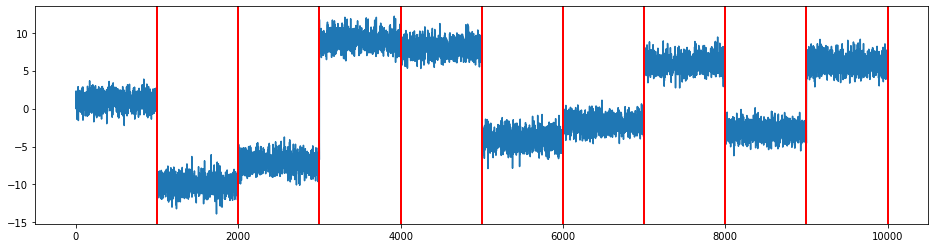

In [39]:
plot_change_points(ts1,change_location1)

#### Section 2.2 Varying variance

In [40]:
# detection
algo2 = rpt.Pelt(model="rbf").fit(ts2)
change_location2 = algo2.predict(pen=10)
change_location2

[2000, 3000, 3990, 5005, 5995, 6995, 8000, 10000]

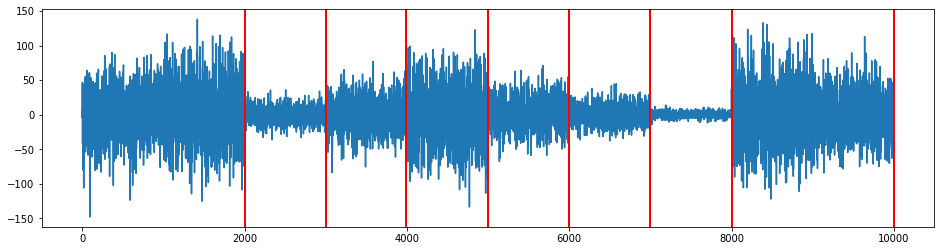

In [41]:
plot_change_points(ts2,change_location2)